In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [51]:
dataset = pd.read_csv('cod.csv')
dataset.isnull().sum()

name              0
wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

In [53]:
df = dataset.drop(['name','misses','xp','hits','shots','prestige'], axis=1)

In [54]:
df.describe()

,wins,kills,kdRatio,killstreak,level,losses,timePlayed,headshots,averageTime,gamesPlayed,assists,scorePerMinute,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,425.915918,630.672657,21.428416,116.695764,685.797176,107.868825,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,786.182499,1305.150393,82.640000,256.354836,1518.383825,116.526676,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,51.000000,32.000000,3.031116,3.000000,36.500000,56.793995,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,485.500000,602.750000,9.085714,110.500000,609.750000,221.648976,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,413.800000,67888.000000


In [55]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm

,wins,kills,kdRatio,killstreak,level,losses,timePlayed,headshots,averageTime,gamesPlayed,assists,scorePerMinute,deaths
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000936,0.000000,0.005189,0.000000,0.000000,0.000000,0.000236
2,0.000000,0.000986,0.343750,0.000000,0.018433,0.0000,0.004279,0.001365,0.023721,0.000000,0.000069,0.000000,0.000943
3,0.000853,0.000030,0.133333,0.000000,0.000000,0.0000,0.000401,0.000000,0.002224,0.000000,0.000000,0.000000,0.000074
4,0.000000,0.000030,0.066667,0.000000,0.000000,0.0000,0.000669,0.000085,0.003706,0.000000,0.000000,0.000000,0.000147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.000000,0.000762,0.144068,0.000000,0.020737,0.0000,0.009493,0.000939,0.052632,0.000000,0.000000,0.000000,0.001738
1554,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1555,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1556,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000134,0.000000,0.000741,0.000000,0.000069,0.220396,0.000000


In [56]:
wcss = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    wcss.append(km.inertia_)

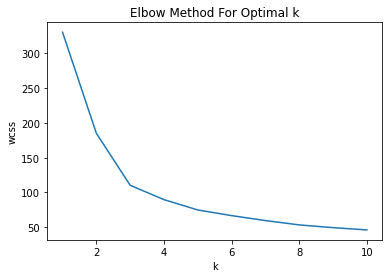

In [57]:
plt.plot(K, wcss)
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('Elbow Method For Optimal k')
plt.show()

In [61]:
clustering = KMeans(n_clusters=3)
clustering.fit(df_norm)

KMeans(n_clusters=3)

In [62]:
dataset['Cluster'] = clustering.labels_
dataset[:-1]

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Cluster
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16,0
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64,0
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5,0
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,LokiiFN#2367402,0,0,0.000000,0,1,0,0,0,1,0,1.0,0,0,0,200,0.0,0,2,0
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118,0
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


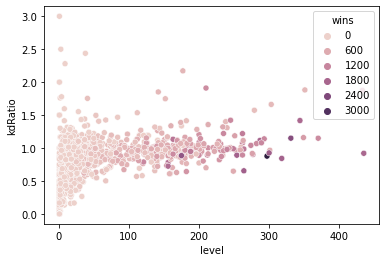

In [63]:
sns.scatterplot(dataset['level'], dataset['kdRatio'], dataset['wins'], hue='Cluster', data=dataset)
plt.show()